<a href="https://colab.research.google.com/github/arpan-mondal/90DaysOfDevOps/blob/main/ML_Arpan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import csv

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
mydata= pd.read_csv("/content/drive/MyDrive/ML/data.csv")

In [ ]:
mydata.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [ ]:
x=pd.DataFrame(mydata)

In [ ]:
import matplotlib.pyplot as plt

<Axes: >

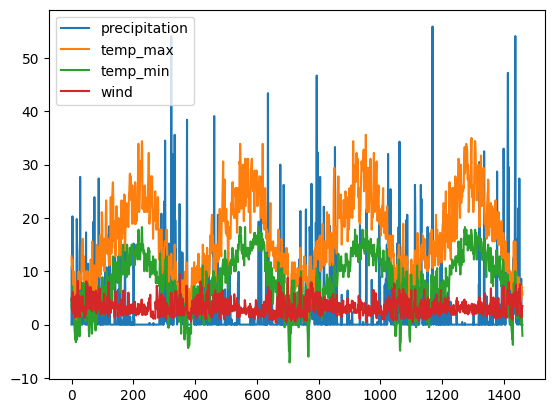

In [ ]:
x.plot()

<Axes: ylabel='Frequency'>

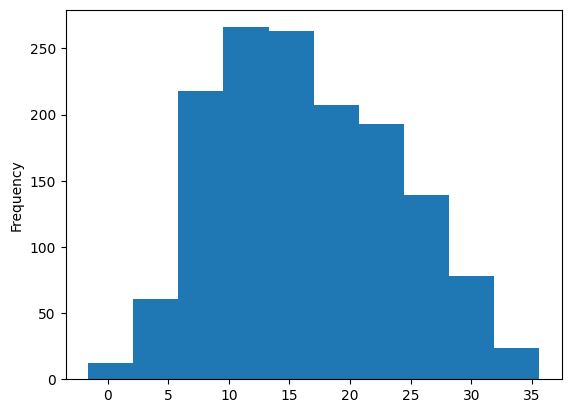

In [ ]:
x['temp_max'].plot(kind='hist')

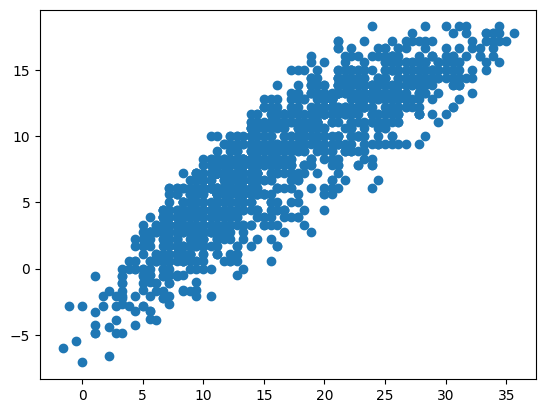

In [ ]:
plt.scatter(x['temp_max'],x['temp_min'])

In [ ]:
X=x['temp_max']
y=x['temp_min']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

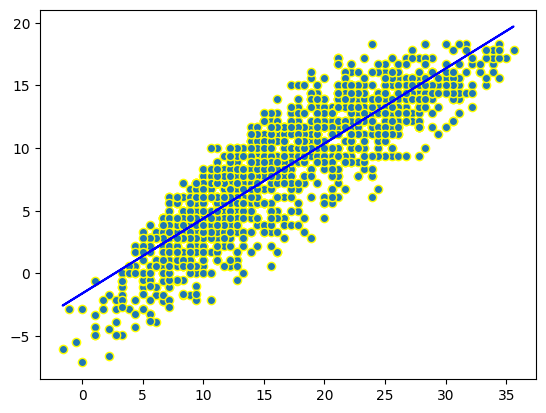

In [ ]:
from scipy import stats

x1 = x['temp_max']
y = x['temp_min']

slope, intercept, r, p, std_err = stats.linregress(x1,y)

def myfunc(x):
  return slope*1 * x + intercept

mymodel = list(map(myfunc, x1))

plt.scatter(x1, y,edgecolors='yellow')
plt.plot(x1, mymodel,'blue')
plt.show()

**Linear Regression**

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 68.6+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder_x= LabelEncoder()
mydata['weather']= label_encoder_x.fit_transform(mydata['weather'])

In [ ]:
mydata['weather']

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int64

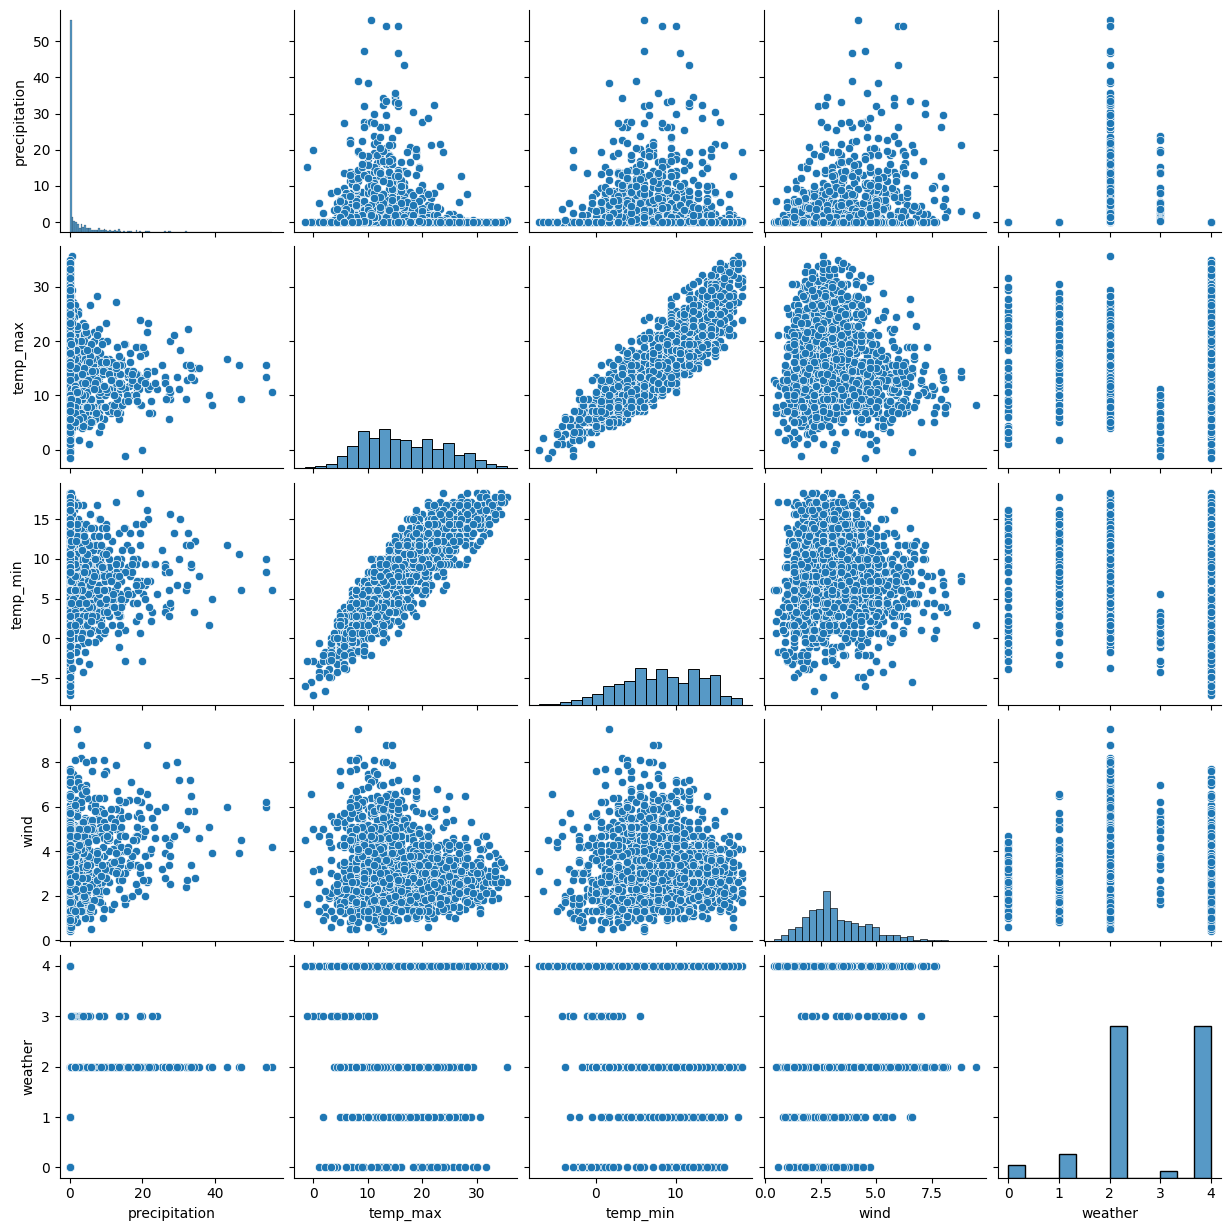

In [ ]:
sns.pairplot(mydata)

In [ ]:
x=mydata[['temp_max']]
y=mydata['temp_min']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(model.coef_)

[0.59323527]


In [ ]:
print(model.intercept_)

-1.5093096882652102


In [ ]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
temp_max,0.593235


In [ ]:
predictions = model.predict(X_test)

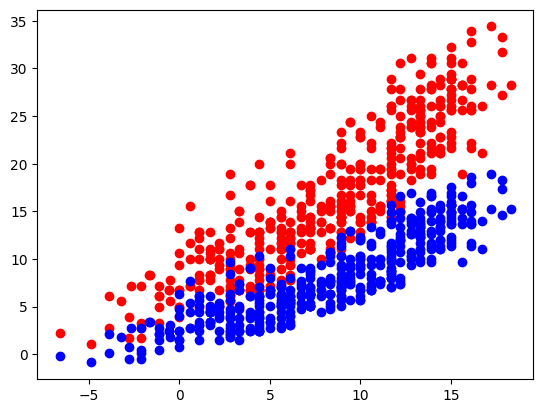

In [ ]:

plt.scatter(y_test, X_test, color ='r')
plt.scatter(y_test, predictions, color ='b')


plt.show()

(array([ 6., 14., 24., 54., 71., 93., 84., 54., 32.,  7.]),
 array([-7.14516055, -5.84092819, -4.53669583, -3.23246347, -1.92823111,
        -0.62399875,  0.68023361,  1.98446598,  3.28869834,  4.5929307 ,
         5.89716306]),
 <BarContainer object of 10 artists>)

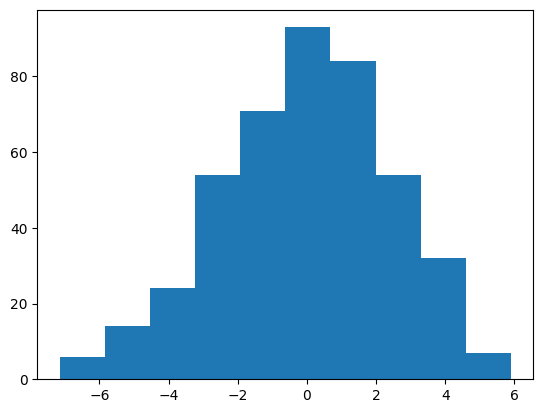

In [ ]:
plt.hist(y_test - predictions)

In [ ]:
y_test

892      0.0
1105     5.8
413      0.0
522      0.0
1036     1.8
        ... 
323     54.1
650      1.0
439      0.0
798      4.3
135      0.0
Name: precipitation, Length: 439, dtype: float64

In [ ]:

from sklearn import metrics

print(metrics.mean_absolute_error(y_test, predictions))

print(metrics.mean_squared_error(y_test, predictions))

print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

1.9655525513572065
5.934364855309547
2.4360551831412907


**Decision Tree**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
mydata= pd.read_csv("/content/drive/MyDrive/ML/Iris.csv")

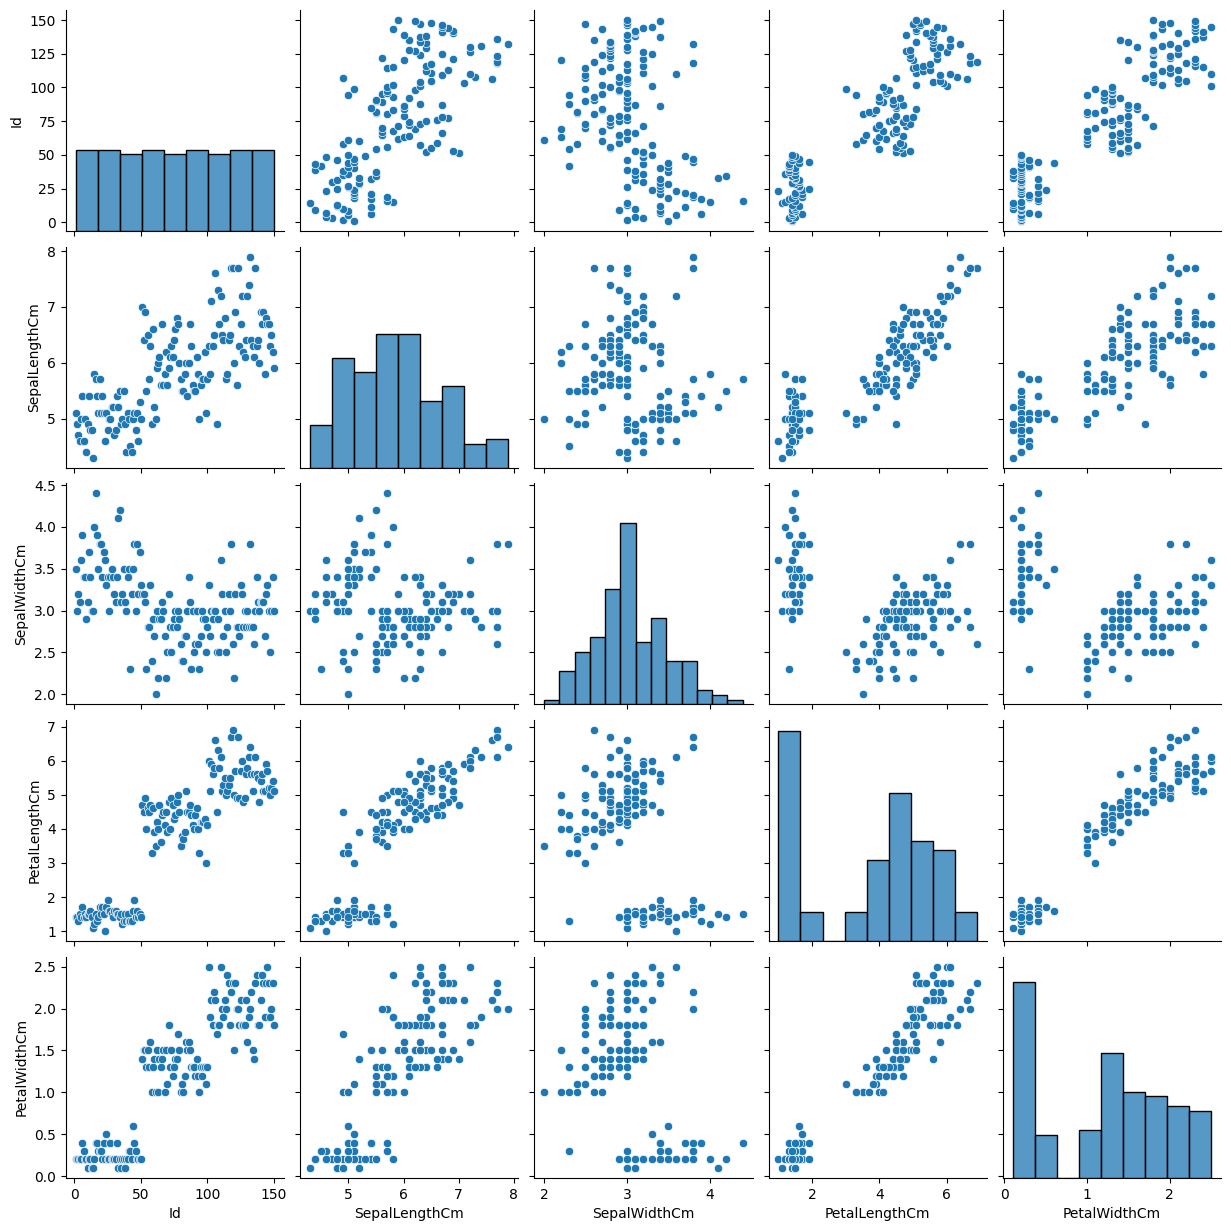

In [ ]:
import seaborn as sns
sns.pairplot(mydata)

In [ ]:
mydata.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
x=pd.DataFrame(mydata)

In [ ]:
features=['SepalLengthCm','SepalWidthCm']#,'PetalLengthCm','PetalWidthCm']

In [ ]:
X=x[features]
y=x['Species']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

[Text(0.36890243902439024, 0.9615384615384616, 'SepalLengthCm <= 5.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.0975609756097561, 0.8846153846153846, 'SepalWidthCm <= 2.8\ngini = 0.237\nsamples = 52\nvalue = [45, 6, 1]'),
 Text(0.04878048780487805, 0.8076923076923077, 'SepalLengthCm <= 4.7\ngini = 0.449\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(0.024390243902439025, 0.7307692307692307, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.07317073170731707, 0.7307692307692307, 'SepalLengthCm <= 4.95\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.04878048780487805, 0.6538461538461539, 'SepalWidthCm <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.024390243902439025, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.07317073170731707, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.0975609756097561, 0.6538461538461539, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.14634146341463414, 0

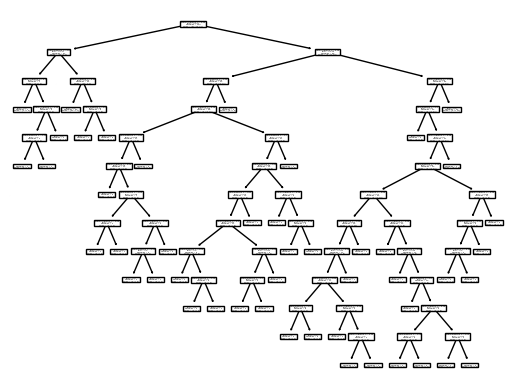

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

**Naive Bayes**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import numpy as np
import pandas as pd
mydata= pd.read_csv("/content/drive/MyDrive/ML/Iris.csv")

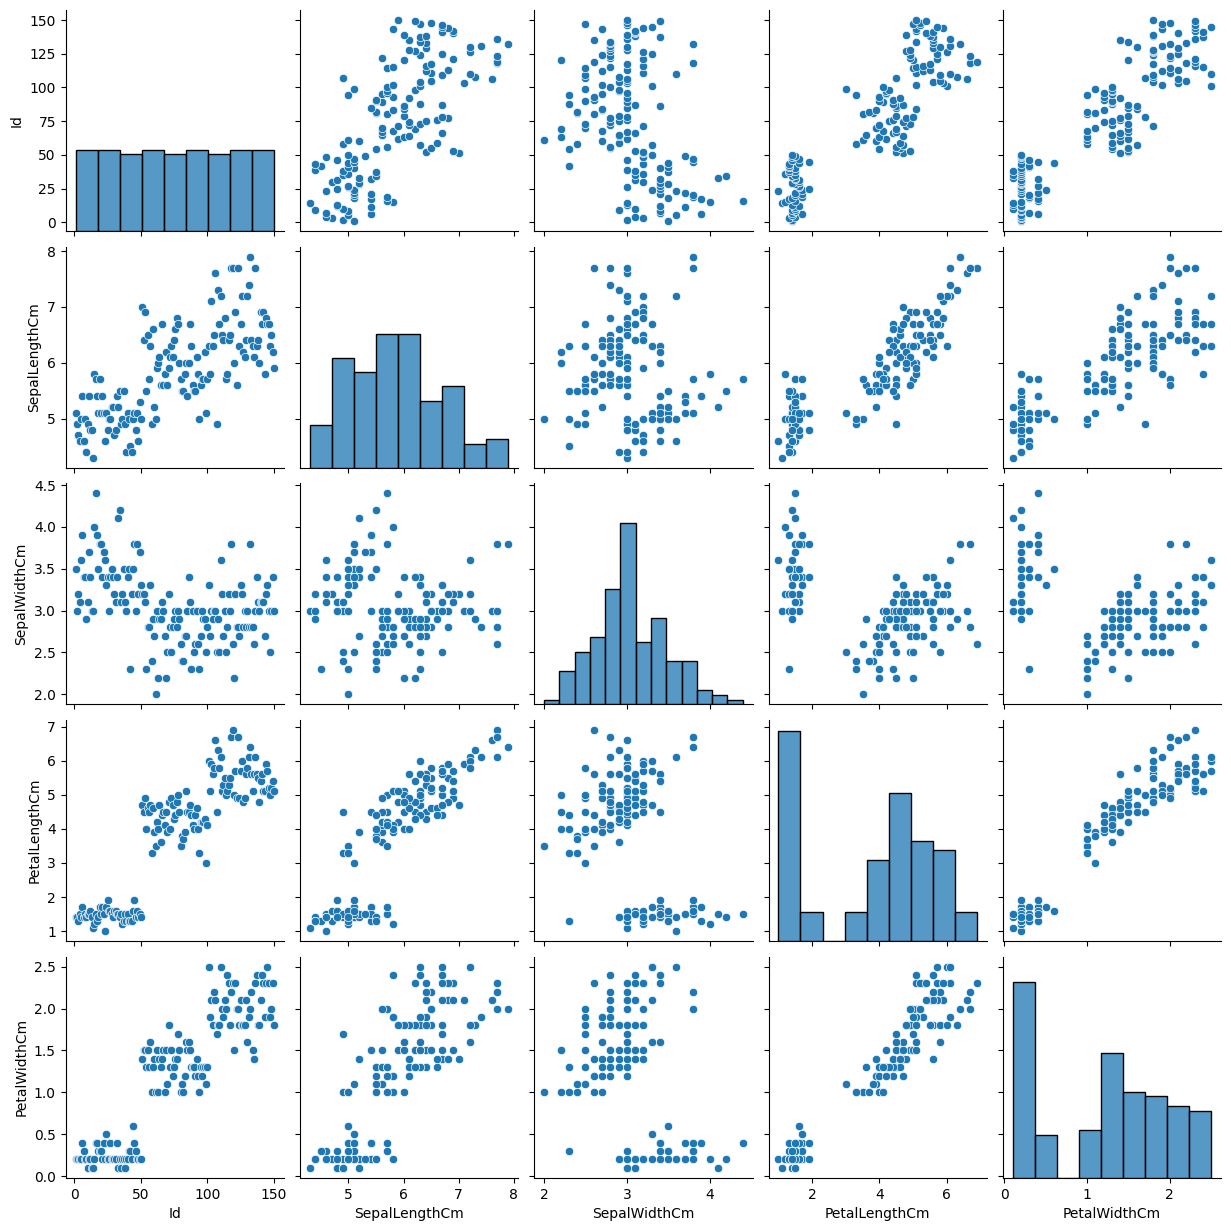

In [ ]:
import seaborn as sns
sns.pairplot(mydata)

In [ ]:
g=sns.relplot(x='PetalLengthCm',y='PetalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

NameError: name 'iris' is not defined

In [ ]:
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)